In [11]:
import pandas as pd
pd.set_option('display.max_columns', 35)

### Asthma EDA 

In [70]:
asthma_df=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/sourcedata/U.S._Chronic_Disease_Indicators__Asthma.csv')
# filtering to data for Nebraska only
asthma_df_Nebraska= asthma_df.query("LocationDesc=='Nebraska'")

# we will select only some required columns for our analysis 
asthma_df_Nebraska_subset=asthma_df_Nebraska[['YearStart','Question','DataValueType','DataValue',
                                          'StratificationCategory1','Stratification1']]

asthma_df_Nebraska_subset

,YearStart,Question,DataValueType,DataValue,StratificationCategory1,Stratification1
51,2010,Emergency department visit rate for asthma,Crude Rate,41.14,Gender,Female
54,2013,Emergency department visit rate for asthma,Number,2450.00,Gender,Male
233,2016,Emergency department visit rate for asthma,Crude Rate,26.91,Overall,Overall
505,2015,Emergency department visit rate for asthma,Number,NaN,Race/Ethnicity,"White, non-Hispanic"
512,2013,Emergency department visit rate for asthma,Number,NaN,Race/Ethnicity,"Black, non-Hispanic"
...,...,...,...,...,...,...
58327,2011,Pneumococcal vaccination among noninstitutiona...,Age-adjusted Prevalence,37.00,Gender,Female
58328,2021,Influenza vaccination among noninstitutionaliz...,Age-adjusted Prevalence,74.30,Gender,Male
58329,2020,Pneumococcal vaccination among noninstitutiona...,Age-adjusted Prevalence,83.80,Gender,Female
58330,2018,Pneumococcal vaccination among noninstitutiona...,Age-adjusted Prevalence,38.90,Race/Ethnicity,"White, non-Hispanic"


In [73]:
asthma_overall_analysis=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/sourcedata/Overall Asthma.csv')
asthma_overall_analysis

,Question (group),Year Start,StratificationCategory1,Stratification1,Data Value
0,ER Visits,2018,Overall,Overall,4803
1,ER Visits,2017,Overall,Overall,4869
2,ER Visits,2016,Overall,Overall,5133
3,ER Visits,2015,Overall,Overall,4473
4,ER Visits,2014,Overall,Overall,6065
5,ER Visits,2013,Overall,Overall,5391
6,ER Visits,2010,Overall,Overall,6798
7,Hospitalizations,2018,Overall,Overall,474
8,Hospitalizations,2017,Overall,Overall,922
9,Hospitalizations,2016,Overall,Overall,456


In [74]:
asthma_overall=asthma_overall_analysis.pivot_table(index=['Year Start'],
                                                      columns='Question (group)',
                                                     values='Data Value',
                                                     aggfunc='sum')
asthma_overall

Question (group),ER Visits,Hospitalizations,Mortality rate
Year Start,,,
2010,6798.0,1346.0,26.0
2011,NaN,NaN,32.0
2012,NaN,NaN,26.0
2013,5391.0,1061.0,25.0
2014,6065.0,1111.0,30.0
2015,4473.0,841.0,36.0
2016,5133.0,456.0,28.0
2017,4869.0,922.0,23.0
2018,4803.0,474.0,23.0


In [75]:
# Joining to AQI and Smoke estimate data to find correlation

smoke_aqi_df=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/smoke_aqi_subset.csv')
smoke_aqi_asthma_join= pd.merge(smoke_aqi_df,asthma_overall,
                                     left_on='wf_year',right_on='Year Start',
                                     how='inner')
smoke_aqi_asthma_join

,wf_year,wf_size,distance,wf_smoke_estimate,aqi,ER Visits,Hospitalizations,Mortality rate
0,2013,20.829540,500.63,17.986304,30.570175,5391.0,1061.0,25.0
1,2013,18.181370,891.56,8.603803,30.570175,5391.0,1061.0,25.0
2,2013,31.571142,896.95,8.475358,30.570175,5391.0,1061.0,25.0
3,2013,6.670909,318.34,22.360296,30.570175,5391.0,1061.0,25.0
4,2013,135.884296,957.55,7.028087,30.570175,5391.0,1061.0,25.0
...,...,...,...,...,...,...,...,...
34215,2019,65.835817,1195.52,1.312019,20.927835,NaN,NaN,36.0
34216,2019,45.212128,357.46,21.424050,20.927835,NaN,NaN,36.0
34217,2019,36.661283,784.08,11.184586,20.927835,NaN,NaN,36.0
34218,2019,65.272980,1056.80,4.641261,20.927835,NaN,NaN,36.0


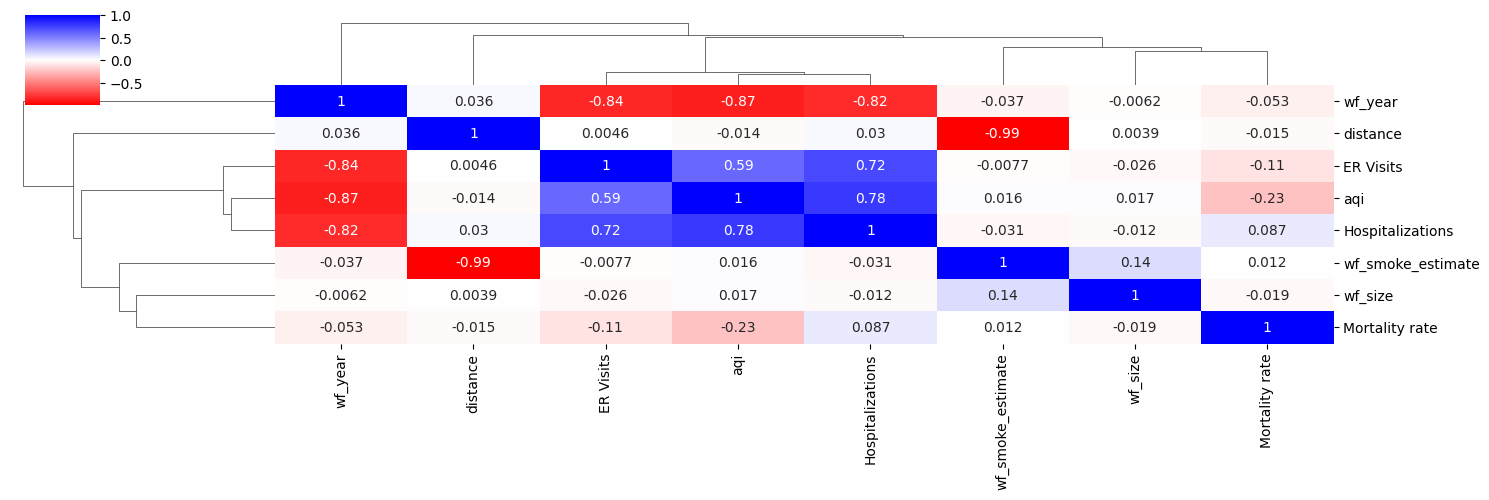

In [76]:
import seaborn as sns
sns.clustermap(smoke_aqi_asthma_join.corr(),annot=True, cmap='bwr_r',figsize=(15,5))

### COPD EDA

In [16]:
copd_df=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/sourcedata/U.S._Chronic_Disease_Indicators__Chronic_Obstructive_Pulmonary_Disease.csv')
# filtering to data for Nebraska only
copd_df_Nebraska= copd_df.query("LocationDesc=='Nebraska'")

# we will select only some required columns for our analysis 
copd_df_Nebraska_subset=copd_df_Nebraska[['YearStart','Question','DataValueType','DataValue',
                                          'StratificationCategory1','Stratification1']]

copd_df_Nebraska_subset

,YearStart,Question,DataValueType,DataValue,StratificationCategory1,Stratification1
4504,2011,Mortality with chronic obstructive pulmonary d...,Number,492.0,Gender,Female
4557,2013,Mortality with chronic obstructive pulmonary d...,Number,521.0,Gender,Male
4588,2015,Mortality with chronic obstructive pulmonary d...,Crude Rate,NaN,Race/Ethnicity,Asian or Pacific Islander
4614,2016,Mortality with chronic obstructive pulmonary d...,Number,1045.0,Race/Ethnicity,"White, non-Hispanic"
4630,2013,Mortality with chronic obstructive pulmonary d...,Age-adjusted Rate,166.2,Gender,Male
...,...,...,...,...,...,...
123791,2017,Influenza vaccination among noninstitutionaliz...,Age-adjusted Prevalence,NaN,Race/Ethnicity,Hispanic
123792,2019,Prevalence of current smoking among adults >= ...,Crude Prevalence,32.6,Overall,Overall
123794,2015,Prevalence of chronic obstructive pulmonary di...,Age-adjusted Prevalence,5.0,Overall,Overall
123795,2013,Prevalence of activity limitation among adults...,Age-adjusted Prevalence,62.7,Gender,Male


In [42]:
copd_grouped=copd_df_Nebraska_subset.query("DataValueType=='Number' and StratificationCategory1=='Gender'")

copd_gender_analysis=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/sourcedata/GenderCOPD.csv')
copd_gender_analysis

,Stratification1,Year Start,Question (group),Data Value
0,Female,2020,Mortality,1686
1,Female,2019,Mortality,1630
2,Female,2018,Mortality,1625
3,Female,2017,Mortality,1727
4,Female,2016,Mortality,1579
5,Female,2015,Mortality,1600
6,Female,2014,Mortality,1558
7,Female,2013,Mortality,1412
8,Female,2012,Mortality,1404
9,Female,2011,Mortality,1426


In [66]:
copd_overall=copd_gender_analysis.pivot_table(index=['Year Start'],
                                                      columns='Question (group)',
                                                     values='Data Value',
                                                     aggfunc='sum')
copd_overall
#copd_gender_analysis_pivot

Question (group),ER visits,Hospital Visits,Mortality
Year Start,,,
2010,38037.0,36534.0,2903.0
2011,NaN,15704.0,3052.0
2012,NaN,14894.0,3088.0
2013,28681.0,35349.0,3064.0
2014,29059.0,33188.0,3230.0
2015,25272.0,32775.0,3385.0
2016,38315.0,42942.0,3310.0
2017,40843.0,72578.0,3596.0
2018,42288.0,45368.0,3462.0


In [67]:
# Joining to AQI and Smoke estimate data to find correlation

smoke_aqi_df=pd.read_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/smoke_aqi_subset.csv')
smoke_aqi_copd_join= pd.merge(smoke_aqi_df,copd_overall,
                                     left_on='wf_year',right_on='Year Start',
                                     how='inner')
smoke_aqi_copd_join

,wf_year,wf_size,distance,wf_smoke_estimate,aqi,ER visits,Hospital Visits,Mortality
0,2013,20.829540,500.63,17.986304,30.570175,28681.0,35349.0,3064.0
1,2013,18.181370,891.56,8.603803,30.570175,28681.0,35349.0,3064.0
2,2013,31.571142,896.95,8.475358,30.570175,28681.0,35349.0,3064.0
3,2013,6.670909,318.34,22.360296,30.570175,28681.0,35349.0,3064.0
4,2013,135.884296,957.55,7.028087,30.570175,28681.0,35349.0,3064.0
...,...,...,...,...,...,...,...,...
34215,2019,65.835817,1195.52,1.312019,20.927835,NaN,16812.0,3408.0
34216,2019,45.212128,357.46,21.424050,20.927835,NaN,16812.0,3408.0
34217,2019,36.661283,784.08,11.184586,20.927835,NaN,16812.0,3408.0
34218,2019,65.272980,1056.80,4.641261,20.927835,NaN,16812.0,3408.0


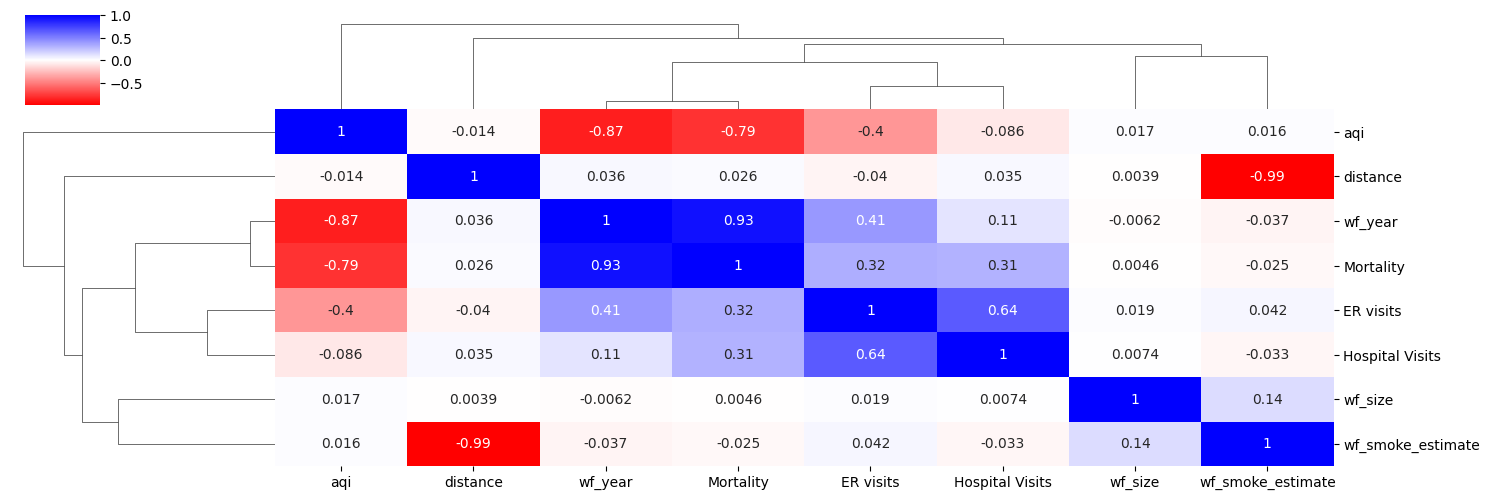

In [69]:
import seaborn as sns
sns.clustermap(smoke_aqi_copd_join.corr(),annot=True, cmap='bwr_r',figsize=(15,5))